<a href="https://colab.research.google.com/github/Parkseojin2001/Machine-Learning_with_python/blob/main/Chapter4_Representing_data_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter4 데이터 표현과 특성 공학

**연속형 특성** : 데이터가 2차원 실수형 배열로 각 열이 데이터 포인트를 설명(많은 애프릴케이션에서는 이러한 방식으로 수집 X)

일반적인 형태는 **범주형 특성(categorical feature)** 또는 **이산형 특성(discrete feature)** 으로 나타나며 이런 특성은 보통 숫자 값이 아니다.

범주형 특성의 예 : 제품의 브랜드, 색상, 판매 분류 &rarr; 연속된 값을 나타나지 않음

*데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 데이터가 어떤 형태의 특성으로 구성되어 있는가보다 중요함*

**특성 공학(feature engineering)** : 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것



## 4.1 범주형 변수

사용햘 데이터 : 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋

데이터셋에 속한 특성 : 근로자 나이, 고용형태, 교육 수준, 성별, 주당 근로시간, 직업, 소득

- 소득(income)이 <=50k와 >50k라는 두 클래스로 나누어짐 &rarr; 분류문제

- age와 hours-per-week : 연속형 특성

- workclass, education, sex, occupation : 범주형 특성 &rarr; 고정된 목록 중 하나를 값으로 가짐

**로지스틱 회귀로 학습**

```
ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0

```
w[i], b : 학습되는 계수

x[i] : 입력 특성(숫자이어야 함)

***로지스틱 회귀를 사용햐려면 데이터를 다른 방식(범주형 특성을 변환)으로 표현해야함***

### 4.1.1 원-핫-인코딩(가변수)

**원-핫-인코딩(one-hot-encoding)** : 범주형 변수를 표현하는데 널리 쓰이며 *원-아웃-오부-엔 인코딩(one-out-of-N encoding) 또는 가변수(dummy variable)라고도 함

**가변수** : 범주형 변수를 0또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것<br>
  &rarr; 선형 이진 분류 공식에 적용할 수 있어 개수에 상관없이 범주마다 하나의 특성을 표현

ex) workclass 특성에 'Government Employee', 'Private Employee', Self Employed', 'Self Employed Incorporated' 있다고 가정

어떤 사람의 workclass 값에 해당하는 특성은 1이 되고 나머지 세 특성은 0이 됨 &rarr; 데이터 포인트마다 정확히 네 개의 새로운 특성 중 하나는 1이 됨.

|workclass|Government Employee|Private Employee|Self Employed|Self Employed Incorporated|
|--------|------------|------------|-------------|------------|
|Government Employee|1|0|0|0|
|Private Employee|0|1|0|0|
|Self Employed|0|0|1|0|
|Self Employed Incorporated|0|0|0|1|


In [ ]:
!pip install mglearn

In [ ]:
!pip install --upgrade joblib==1.1.0

In [4]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [5]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정
# "names" 매개변수로 열 이름을 제공
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header = None, index_col = False,
                   names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                            'marital-status', 'occupation', 'relationship', 'race', 'gender', 
                            'capital-gain', 'capital-loss', 'hours-per-week', 'natice-country', 'income'])
# 예제를 위해 몇개의 열만 선택
data = data[['age','workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### 문자열로 된 범주형 데이터 확인하기

데이터셋 읽기 &rarr; 열에 어떤 의미 있는 범주형 데이터가 있는지 확인 &rarr; 정해진 범주 밖의 값이 있거나 청자난 대소문자가 틀려서 데이터를 전처리를 해야할 수 있음

열의 내용을 확인하는 방법 : pandas에서 Series에 있는 value_counts 메서드를 사용

In [6]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [7]:
# get_dummies 함수는 객체 타입이나 범주형을 가진 열을 자동으로 변환
# 연속형 특성은 그대로지만 범주형 특성은 값마다 새로운 특성으로 확장
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


data_dummies의 values 속성을 이용해 DataFrame을 NumPy 배열로 바꿔 머신러닝 모델을 학습시킴

학습 전에 이 데이터로부터 타깃 값을 분리

**출력값이나 출력값으로부터 유도된 변수를 특성 표현에 포함하는 것을 주의(포함 X)**

In [9]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


**훈련 세트와 테스트 세트의 열 이름을 비교해서 같은 속성인지 확인하는 것이 중요**

&rarr; 다르면 매우 나쁜 결과를 얻을 수 있음

### 4.1.2 숫자로 표현된 범주형 특성

범주형 변수가 숫자로 인코디된 경우

1) 저장 공간을 절약

2) 데이터 취합 방식

In [11]:
# get_dummies : 숫자 특성은 모두 연속형이라고 생각해서 가변수로 만들지 않음
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 형성
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [12]:
# 숫자 특성은 인코딩 X, 범주형 특성 인코딩
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [13]:
# 숫자 특성을 가변수로 만들기 -> columns 매개변수에 인코딩하고 싶은 열을 명시
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 OneHotEncoder와 ColumnsTransformer : scikit-learn으로 범주형 변수 다루기


In [14]:
from sklearn.preprocessing import OneHotEncoder
# sparse = False로 설정하면 OneNotEncoder가 희소 행렬이 아니라 넘파이 배열을 반환
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [15]:
# 원본 범주형 변수 이름 얻기 : get_feature_names_out 메서드 사용
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


OneHotEncoder : 모든 특성을 범주형이라고 가정

ColumnTransformer : 입력 데이터에 있는 열마다 다른 변환을 적용

In [16]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


***Goal)*** 선형 모델을 적용하여 소득을 예측

1) 범주형 변수에 원-핫-인코딩을 적용

2) 연속형 변수(age & hours-per-week)의 스케일 조정 &rarr; ColumnTransformer 사용

- 각 열의 변환은 이름, 변환기 객체, 이 변환이 적용될 열을 지정

- 열은 열 이름이나 정수 인덱스, 불리언 마스크(Boolean mask)로 선택 

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse = False),
     ['workclass', 'education', 'gender', 'occupation'])])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출
data_features = data.drop("income", axis = 1)
# 데이터프레임과 income을 분할
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [19]:
# 선형 모델 형성
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


*데이터 스케일이 영항을 주지 못함(Test score이 0.81로 동일)*

In [20]:
# ColumnsTransformer안으 단계에 접근하려면 named_transformers_ 속성을 사용
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

## 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기



In [21]:
# make_columns_transformer : 클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여줌
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse = False), ['workclass', 'education', 'gender', 'occupation'])
)

## 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

데이터를 가장 잘 표현하는 방법 : 데이터가 가진 의미 + 사용할 모델 선택

선형 모델과 트리 기반 모델은 특성의 표현 방식으로 인해 미지는 영향이 매우 다름

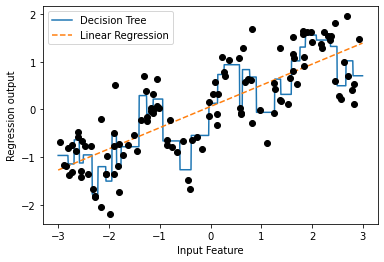

In [22]:
# 선형 회귀 모델과 결정 트리 회귀를 비교
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label = "Linear Regression")
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input Feature")
plt.legend(loc = "best")
plt.show()

**구간 분할(bining)** : 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 중 하나로 한 특성을 여러 특성으로 나누는 방법(**이산화**라고도 함)

ex) 위의 그래프를 10개의 구간으로 나누자

1) 균일한 너비로(구간의 경계 간의 거리가 동일) 분할

2) 데이터의 분위를 사용(데이터가 많을수록 구간이 좁아짐)

In [23]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [24]:
# transform 메서드 : 각 데이터 포인트를 해당되는 구간으로 인코딩
# KBinsDiscretizer : 구간에 원-핫-인코딩을 적용
# 구간마다 하나의 새로운 희소 행렬을 생성(10개의 구간 -> 10차원 데이터 형성)
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [25]:
# 희소 행렬 -> 밀집 배열(원본 데이터 포인트와 인코딩 결과 비교)
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

**출력된 결과 분석**

- 첫 번째 데이터 포인트(-0.75275929) : 네 번째 구간<br>
- 두 번째 데이터 포인트(2.70428584) : 열 번째 구간

&rarr; array 배열에서 1이 저장된 곳에 데이터 포인트가 저장


In [26]:
# 원-핫-인코딩된 밀집 배열 생성
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

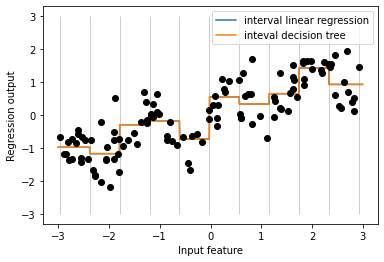

In [27]:
# 원-핫-인코딩된 데이터로 선형 회귀 모델과 결정 트리 모델을 비교
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'interval linear regression')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'inteval decision tree')
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.show()

**그래프 분석**

- 선형 회귀 모델과 결정 트리가 같은 예측을 만들어냄

- 구간별로 예측한 것은 상수값이며, 각 구간 안에서는 특성의 값이 상수이므로 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측

- 선형 모델은 각 구간에서 다른 값을 가지고 있으므로 전과 비교해 유연해짐 &rarr; 구간을 나누는 것이 이득

- 결정 트리 모델은 덜 유연 &rarr; 툭성 값을 구간으로 나누는 것은 득이 안됨

## 4.5 상호작용과 다항식

**상호작용(interaction) & 다항식(polynomial)** : 특성을 풍부하게 나타내는 또 하나의 방법

In [28]:
# 선형 모델은 절편 외에도 기울기도 학습 가능
# 기울기 추가 방법은 구간으로 분할된 데이터에 원래 특성을 다시 추가
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


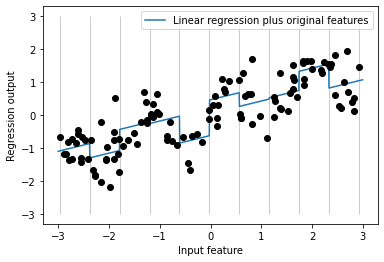

In [29]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = "Linear regression plus original features")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c = 'k')
plt.show()

**그래프 분석**

- 각 구간의 절편과 기울기를 학습했으며 학습된 기울기는 양수이고 모든 구간에 걸쳐 동일

- x 축 특성이 하나이므로 기울기도 하나이다

- 개선할 점 : 각 구간에서 다른 기울기를 가지는 게 좋을 것 같음<br>
  &rarr; 데이터 포인트가 있는 구간과 x 축 사이의 상호작용 특성을 추가(구간 특성 * 원본 특성)

In [30]:
# 상호작용 특성 = 구간 특성 * 원본 특성
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


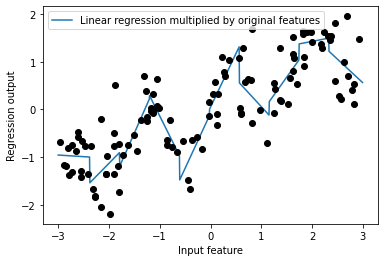

In [31]:
# 데이터 포인트가 속한 구간 + 데이터 포인트가 속한 구간 * 원본 특성 = 20개의 특성
# 구간별 기울기가 다른 선형 회귀
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = 'Linear regression multiplied by original features')

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")
plt.show()

In [32]:
# 원본 특성의 다항식을 추가
from sklearn.preprocessing import PolynomialFeatures
# x ** 10까지 고차항을 추가
# 기본값인 "include_bias = True"는 절편에 해당하는 1인 특성을 추가
poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [33]:
# 10차원 사용 -> 10개의 특성 사용
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [34]:
# X와 X_poly 비교
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [35]:
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


**다항 회귀(polynomial regression)** : 다항식 특성 + 선형 모델

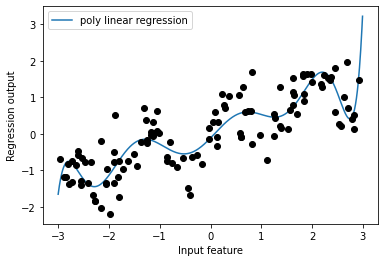

In [36]:
# 10차 다항식을 이용한 선형 회귀
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = 'poly linear regression')
plt.plot(X[:,0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")
plt.show()

**그래프 분석**

- 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 형성

- 고차원 다항식은 데이터가 부족한 영역에서 너무 민감하게 동작함

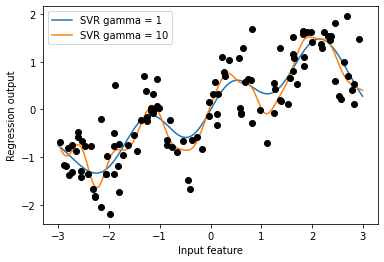

In [37]:
# 원본 데이터에 커널 SVM 모델을 학습
from sklearn.svm import SVR

for gamma in [1, 10]:
  svr = SVR(gamma = gamma).fit(X, y)
  plt.plot(line, svr.predict(line), label = 'SVR gamma = {}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")
plt.show()

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [39]:
# 차수를 2로 하여 다항식 특성을 추출
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


**출력값 분석**

- 원래 특성 : 13개

- 교차 특성 : 105개(원래 특성의 제곱 + 두 특성의 조합)

- degree = 2로 하여 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻음

In [40]:
# get_feature_names : 어떤 원본 특성이 곱해져 새 특성이 만들어졌는지 관계를 확인
print("다항 특성 이름:\n",poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


첫 번쨰 특성 : 상수항 "1"<br>
x0 ~ x12 : 13개의 원본 특성<br>
x0^2 : 첫 번째 특성과 다른 특성 간의 조합<br>

In [41]:
# 상호작용 특성이 있는 경우와 없는 경우 성능 비교
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score when there is no interaction feature: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score when there is interaction feature: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score when there is no interaction feature: 0.621
Score when there is interaction feature: 0.753


In [42]:
# 랜덤 포레스트인 경우
# 상호작용인 경우가 성능이 더 안좋음
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_scaled, y_train)
print("Score when there is no interaction feature: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_poly, y_train)
print("Score when there is interaction feature: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score when there is no interaction feature: 0.795
Score when there is interaction feature: 0.775


## 4.6 일변량 비선형 변환

- 수학 함수를 적용하는 방법도 특성 변환에 유용
  - 트리 기반 모델은 특성의 순서에만 영향을 받음
  
  - 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관

- 특성과 타깃 값 사이에 비선형성이 존재 &rarr; 모델(특히 선형 모델)을 만들기 어려움

- log, exp는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 줌

- sin과 cos 함수는 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리

- 대부분의 모델은 각 특성이 정규 분포와 비슷할 때 최고의 성능을 가짐 &rarr; 특성의 히스토그램이 종 모양과 비슷한 경우

- log 나 exp 같은 변환이 도움이 되는 경우는 정수 카운트 데이터를 다루는 경우

  카운트 데이터란? - "사용자가 얼마나 자주 로그인하는가?" 같은 특성, 음수인 경우 특별한 통계 패턴을 따름

In [43]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
w = rnd.normal(size = 3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [44]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


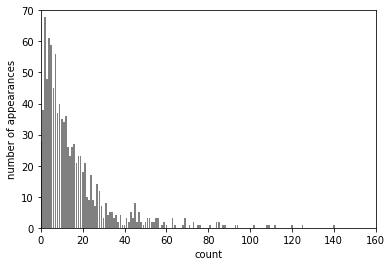

In [46]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color = 'grey')
plt.ylabel("number of appearances")
plt.xlabel("count")
plt.show()

**그래프 분석**

- 작은 수치는 많고 큰 수치는 몇 안되는 분포(자주 나타남)는 선형 모델이 잘 처리하지 못하는 데이터 분포임

In [47]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score : {:.3f}".format(score))

Test score : 0.622


*R^2 점수가 비교적 낮음 = Ridge는 X와 y의 관계를 제대로 모델링 X &rarr; 로그 스케일로 변환*

In [48]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

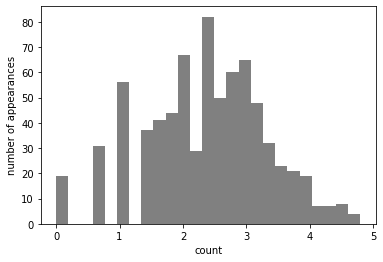

In [51]:
plt.hist(X_train_log[:, 0], bins = 25, color = 'gray')
plt.ylabel("number of appearances")
plt.xlabel("count")
plt.show()

In [53]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


위의 예는 모든 특성이 같은 속성을 가지고 있지만 대부분은 그렇지 않으며 일부 특성만 변환하거나 특성마다 모두 다르게 변환하기도 한다.

- 구간 분할, 다항식, 상호작용은 선형 모델이나 나이브 베이즈 모델 같은 덜 복잡한 모델에 큰 영향을 줌

- 트리 기반 모델은 스스로 중요한 상효작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환 X

- SVM, 최근접 이웃, 신경망 같은 모델도 특성 변환에 이득을 볼 수 있음


**선형 모델, 나이브 베이즈 > SVM, 최근접 이웃, 신경망 > 트리 기반 모델**

## 4.7 특성 자동 선택

보통 새로운 특성을 추가하거나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋음(과대적합 가능성 &darr;)

**1) 일변향 통계(univariate statistics)**

**2) 모델 기반 선택(model-based selection)**

**3) 반복적 선택(iterative selection)**

위의 세가지 방법 모두 지도 학습 방법이므로 최적값을 찾으려면 타깃값이 필요하며 데이터를 훈련 세트와 테스트 세트로 나눈 다음 훈련 데이터만 특성 선택에 사용해야한다.

### 4.7.1 일변량 통계

개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산 &rarr; 깊게 관련되어 있다고 판단되는 특성을 선택

**분산분석(ANOVA, analysis of variance)** : 데이터를 클래스별로 나누어 평균을 비교하는 방법이로 핵심 요소는 *일변량* 이며 각 특성이 독립적으로 평가됨

- 일변량 분석은 계산이 매우 빠름

- 평가를 위해 모델을 만들 필요 X

- 특성을 선택한 후 적용하려는 모델에 상관없이 사용 O

**일변량 분석으로 특성을 선택하려는 경우**

1) 분류에서는 f_classif(기본값), 회귀에서는 f_regression을 보통 선택하여 테스트함

2) 계산한 p-값(p-value)에 기초하여 특성을 제외하는 방식으로 선택

  - 매우 높은 p-값을 가진(타깃 값과 연관성 &darr;) 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용

  - 임계값 계산 방법 : SelectKBest(고정된 k개의 특성을 선택, 가장 간단함), SelectPercentile(지정된 비율만큼 특성을 선택)



In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가
# 처음 30개는 원본 특성이고 다음 50개는 노이즈임
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state = 0, test_size = .5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택
select = SelectPercentile(score_func = f_classif, percentile = 50)
select.fit(X_train, y_train)
# 훈련 세트에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


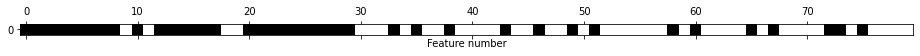

In [55]:
# get_support : 선택된 특성을 표시
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Feature number")
plt.yticks([0])
plt.show()

**그래프 분석**

- 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거

- 원본 특성이 완벽하게 복원 X

In [57]:
# '전체 특성을 이용 vs 선택된 특성만 이용' 로지스틱 회귀 성능 비교
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter = 5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(X_test_selected, y_test)))                                

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.937


*너무 많은 특성 때문에 모델을 만들기 현실적으로 어렵거나 많은 특성들이 도움이 안 된다고 생각될 때 일변량 분석을 사용하여 특성을 선택하면 큰 도움이 될 수 있음*

## 4.7.2 모델 기반 특성 선택

- 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택(최종에 사용할 모델과 같을 필요 X)

- 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서를 매길 수 있어야함

- 결정트리는 feature_importances_ 속성을 제공, 선형 모델 계수의 절댓값도 특성의 중요도를 재는 데 사용

- 모델 기반 특성 선택은 한 번에 모든 특성을 고려하므로 상호작용 부분을 반영(일변량 분석과는 반대)

In [58]:
# SelectFromModel : 중요도가 지정한 임계치보다 큰 모든 특성을 선택
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = "median")

In [59]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


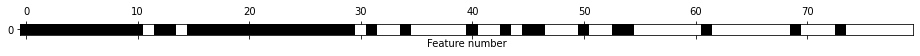

In [62]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Feature number")
plt.yticks([0])
plt.show()

**그래프 분석**

- 2개를 제외한 모든 원본 특성이 선택

- 일부 노이즈 특성 선택

In [63]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter = 5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.947


### 4.7.3 반복적 특성 선택

**반복적 특성 선택(Iterative Feature Selection)** : 특성의 수가 각기 다른 일련의 모델을 형성, 계산 비용이 훨씬 많이 듬

- 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건에 도달할 때까지 하나씩 추가하는 방법

- 모든 특성을 가지고 시작해서 어떤 종료 조건이 될 때까지 특성을 하나씩 제거하는 방법

  &rarr; **재귀적 특성 제거(RFE, recursive feature elimination)**

    1) 모든 특성으로 시작해서 모델을 만들고 특성 중요도가 가장 낮은 특성을 제거
  
    2) 제거한 특성을 빼고 나머지 특성 전체로 새로운 모델을 형성

    3) 미리 정의한 특성 개수가 남을 때까지 계속함

    *특성 선택에 사용할 모델은 특성의 중요도를 결정하는 방법을 제공이 필요*

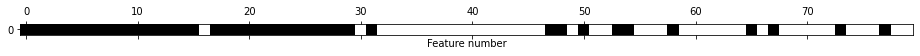

In [65]:
# 랜덤 포레스트 분류 모델을 사용한 RFE가 선택한 특성
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 40)
select.fit(X_train, y_train)
# 선택된 특성을 표시
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Feature number")
plt.yticks([0])
plt.show()

**그래프 분석**

- 일변량 분석이나 모델 기반 선택보다 특성 선택이 나아졌지만, 여전히 특성 한 개를 놓침

- 랜덤 포레스트 모델은 특성이 누락될 때마다 다시 학습하므로 40번이나 실행

In [66]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter = 5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.940


In [67]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


머신러닝 알고리즘에 어떤 입력값을 넣을지 확신이 안 서는 경우 특성 자동 선택이 도움이 될 수 있으며 예측 속도를 높이거난 해석하기 더 쉬운 모델을 만드는 데 필요한 만큼 특성의 수를 줄이는 데 효과적임

## 4.8 전문가 지식 활용

특성 공학은 특정한 애플리케이션을 위해 전문가 지식을 사용할 수 있는 영역으로 종종 분야 전문가는 초기 데이터에서 더 유용한 특성을 선택할 수 있도록 도움을 준다

ex) 여행사를 위한 항공료 예측
  
  - 휴가 성수기난 공휴일 근처에는 항공료가 더 비쌈

작업에 내재된 사전 지식이 특성으로 추가될 수 있다면 머신러닝 알고리즘에 도움이 됨(but, 반드시 그 특성을 사용하는 것 X) 

In [68]:
citibike = mglearn.datasets.load_citibike()

In [69]:
print("city bike data:\n", citibike.head())

city bike data:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


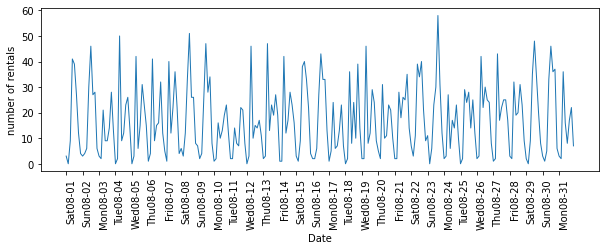

In [71]:
# 8월 한 달 동안의 대여 횟수
plt.figure(figsize = (10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
xticks_name = [week[int(w)] + d for w, d in zip(xticks.strftime("%w"), xticks.strftime("%m-%d"))]
plt.xticks(xticks, xticks_name, rotation = 90, ha = "left")
plt.plot(citibike, linewidth = 1)
plt.xlabel("Date")
plt.ylabel("number of rentals")
plt.show()

**시계열 데이터 사용 방법**

- 과거 데이터를 학습 데이터로 사용하고 그 이후의 시간의 데이터는 테스트 데이터로 사용

In [73]:
# 타깃 값 추출(대여 횟수)
y = citibike.values
# POSIX 시간을 10 ** 9로 나누어 변환
X = citibike.index.astype("int64").values.reshape(-1, 1)

<ipython-input-73-f8c50966bd85>:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  X = citibike.index.astype("int64").values.reshape(-1, 1)


In [75]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 형성
def eval_on_features(features, target, regressor):
  # 훈련 세트와 테스트 세트로 나눔
  X_train, X_test = features[:n_train], features[n_train:]
  # 타깃 값도 나눔
  y_train, y_test = target[:n_train], target[n_train:]
  regressor.fit(X_train, y_train)
  print("Test set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
  y_pred = regressor.predict(X_test)
  y_pred_train = regressor.predict(X_train)
  plt.figure(figsize = (10, 3))

  plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha = "left")

  plt.plot(range(n_train), y_train, label = "train")
  plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = "test")
  plt.plot(range(n_train), y_pred_train, '--', label = "train predict")

  plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "test predict")
  plt.legend(loc = (1.01, 0))
  plt.xlabel("Date")
  plt.ylabel("number of rentals")

Test set R^2: -0.04


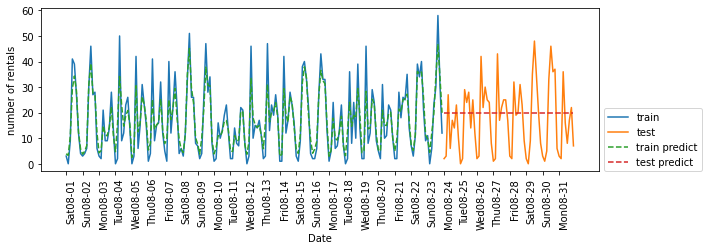

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
eval_on_features(X, y, regressor)

**그래프 분석**

- 훈련 세트 예측은 매우 정확

- 테스트 세트에 대해선 한 가지 값으로 예측

**문제점**

- 트리 모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽할 수 있는 능력 X

  = 테스트 세트에 있는 시간 특성의 값이 훈련 세트에 있는 시간 값보다 뒤의 시간임

- 테스트 세트와 가장 가까이 있는 마지막 훈련 세트 데이터의 타깃 값을 예측으로 사용

**해결책**

- 전문가 지식을 필요 = *'시간과 요일 '* 이 두 가지 특성을 추가

Test set R^2: 0.60


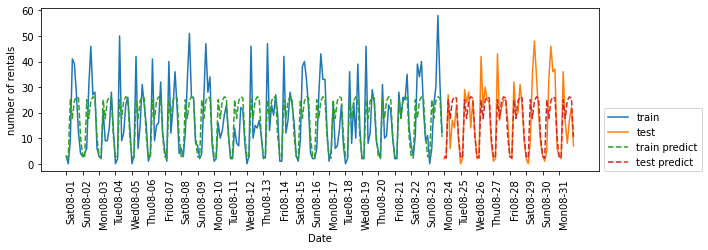

In [77]:
# 시간만 사용
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test set R^2: 0.84


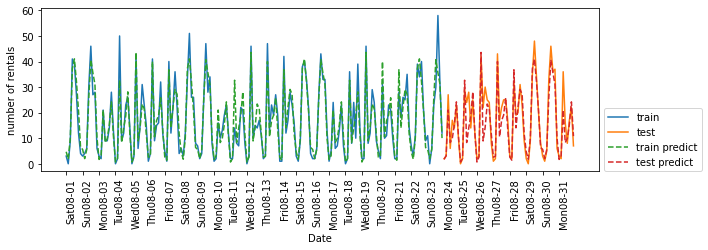

In [78]:
# 시간 + 요일 사용
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test set R^2: 0.13


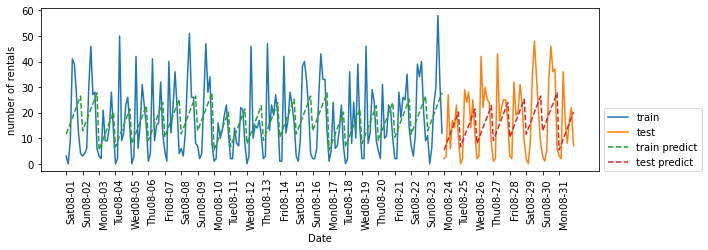

In [79]:
# 랜덤 포레스트 대신 LinearRegression을 적용
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

**문제점**

랜덤 포레스트보다 선형회귀 성능이 더 나쁜 이유

&rarr; 요일과 시간이 정수로 인코딩되어 연속형 변수로 해석

*선형 회귀는 선형 함수로 시간을 학습하므로 하루에 시간이 흐를수록 대여 수가 늘어나게 학습함*

**해결책**

- OneHotEncoder를 사용해 정수형을 범주형 변수로 해석하도록 함

In [80]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test set R^2: 0.62


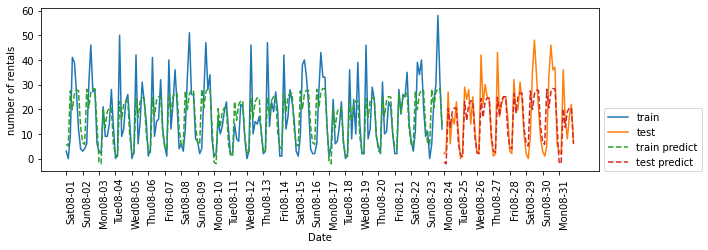

In [81]:
# 요일마다 하나의 계수 학습 + 시간마다 하나의 계수 학습 = 시간 패턴이 모든 날에 걸쳐 공유
eval_on_features(X_hour_week_onehot, y, Ridge())

Test set R^2: 0.85


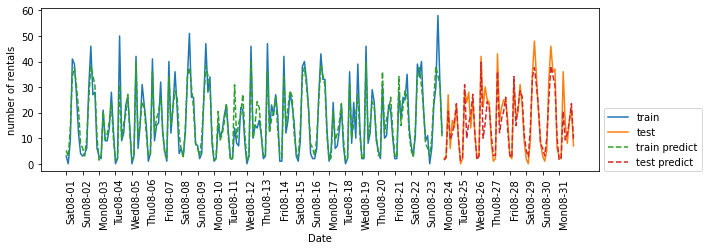

In [82]:
# 시간과 요일의 곱을 특성으로 사용해서 만듦(상호작용 특성을 사용하여 시간 + 요일 조합별 계수를 학습)
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [83]:
# 무엇이 학습되었는지 확인
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [84]:
# 추출한 모든 상효작용 특성에 이름을 달기(계수가 0이 아닌 특성만 선택)
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

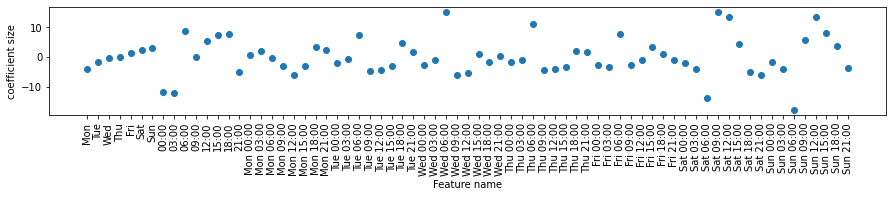

In [85]:
plt.figure(figsize = (15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation = 90)
plt.xlabel("Feature name")
plt.ylabel("coefficient size")
plt.show()

## 4.9 요약 및 정리

**머신러닝 알고리즘에 적합한 방식으로 데이터 표현하는 것이 굉장히 중요함**

ex) 원-핫-인코딩 범주형 변수

선형 모델 : 구간 분할, 다항식, 상호작용 특성을 추가해 큰 이득을 볼 수 있음

비선형 모델(랜덤 포레스트 & SVM) : 특성을 늘리지 않고서도 문제 해결이 가능